In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import fcann2
import tf_logreg
import tf_deep
import data
import ksvm_wrap

# Fcann

iteration 0: loss 412.7671230896055
iteration 1000: loss 60.53976594780225
iteration 2000: loss 37.63398997899304
iteration 3000: loss 24.309120586407264
iteration 4000: loss 15.75892643364815
iteration 5000: loss 14.716066398242264
iteration 6000: loss 13.473415947014413
iteration 7000: loss 12.83138612125074
iteration 8000: loss 12.148217059900908
iteration 9000: loss 11.610160676696015


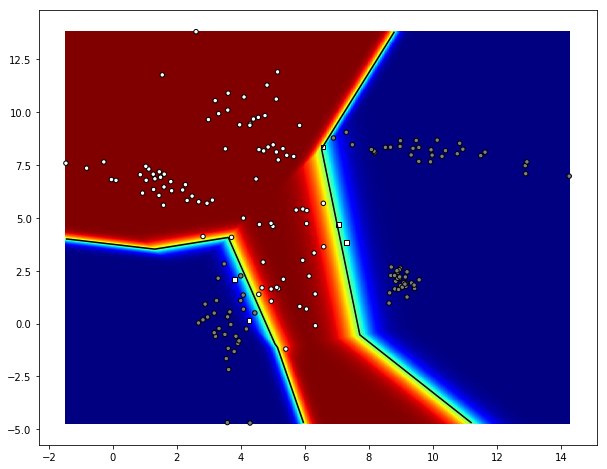

In [3]:
np.random.seed(100)

X, Y_ = data.sample_gmm_2d(6, 2, 30)

clf = fcann2.fcann2(H=5)

clf.fcann2_train(X, Y_)
dec_fun = lambda X: clf.fcann2_classify(X)[:,1]
probs = dec_fun(X)

Y = probs > 0.5
rect = (np.min(X, axis=0), np.max(X, axis=0))

figure(figsize=(10,8))
data.graph_surface(dec_fun, rect, offset=0.5)
data.graph_data(X, Y_, Y)

plt.show()

# Tensorflow linear regression

0.31855613 0.025283372 19.755482
[[-31.855614    0.       ]
 [ -2.5283372   0.       ]]
[[-31.85562]] -2.5283372
0.9850618 1.9036535 0.6214532
[[-0.01635057  0.9848983 ]
 [-1.1055093   1.8925984 ]]
[[-0.0163506]] -1.1055093
0.99535435 2.5995958 0.089557074
[[-0.00602849  0.9952941 ]
 [-0.40754586  2.5955203 ]]
[[-0.0060285]] -0.40754583
0.9991488 2.856155 0.017270926
[[-2.2212304e-03  9.9912655e-01]
 [-1.5024164e-01  2.8546524e+00]]
[[-0.00222123]] -0.15024164
1.0005475 2.9507344 0.007447098
[[-8.2005281e-04  1.0005393e+00]
 [-5.5387352e-02  2.9501805e+00]]
[[-0.00082005]] -0.05538735
1.0010632 2.9856017 0.006111976
[[-2.9945839e-04  1.0010602e+00]
 [-2.0418873e-02  2.9853976e+00]]
[[-0.00029946]] -0.020418873
1.0012532 2.998456 0.0059305215
[[-1.11953355e-04  1.00125217e+00]
 [-7.52720516e-03  2.99838066e+00]]
[[-0.00011196]] -0.0075272056
1.0013233 3.0031948 0.0059058596
[[-4.0709041e-05  1.0013230e+00]
 [-2.7744859e-03  3.0031672e+00]]
[[-4.0714734e-05]] -0.0027744877
1.0013491 3.00

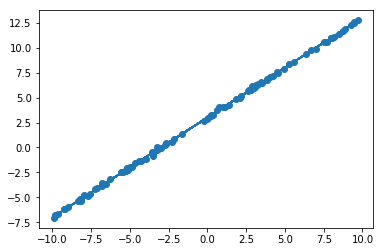

In [17]:
f = lambda x: x + 3

N = 100
Xs = np.random.uniform(-10, 10, N)
Ys = f(Xs) + np.random.normal(0, 0.1, N)
Xs, Ys = Xs.reshape(-1, 1), Ys.reshape(-1, 1)

X  = tf.placeholder(tf.float32, [None, 1])
Y_ = tf.placeholder(tf.float32, [None, 1])
a = tf.Variable(0.0)
b = tf.Variable(0.0)

Y = a*X + b
loss  = 1./(2*N) * (Y-Y_)**2

trainer = tf.train.GradientDescentOptimizer(0.01)
train_op = trainer.minimize(loss)
grads = trainer.compute_gradients(loss, [a, b])
optimize = trainer.apply_gradients(grads)
grads = tf.Print(grads, [grads], 'Status:')

grad_a = (1/N) * tf.matmul(Y-Y_,  X, transpose_a=True)
grad_b = (1/N) * tf.reduce_sum(Y-Y_)

sess = tf.Session()
sess.run(tf.initialize_all_variables())
plt.scatter(Xs, Ys, marker='o')

for i in range(1000):
    val_loss, val_grads, val_grad_a, val_grad_b = sess.run([loss, grads, grad_a, grad_b], feed_dict={X: Xs, Y_: Ys})
    _, val_a, val_b = sess.run([train_op, a, b], feed_dict={X: Xs, Y_: Ys})

    if i% 100 == 0:
        print(val_a, val_b, val_loss.sum())
        print(val_grads)
        print(val_grad_a, val_grad_b)

plt.plot(Xs, val_a*Xs + val_b)
plt.show()


# Tensorflow logistic regression

iteration 0: loss 1.210646152496338
iteration 100: loss 0.39019203186035156
iteration 200: loss 0.3198263943195343
iteration 300: loss 0.29152676463127136
iteration 400: loss 0.27633175253868103
iteration 500: loss 0.2667106091976166
iteration 600: loss 0.25996923446655273
iteration 700: loss 0.25492674112319946
iteration 800: loss 0.25098609924316406
iteration 900: loss 0.24781134724617004


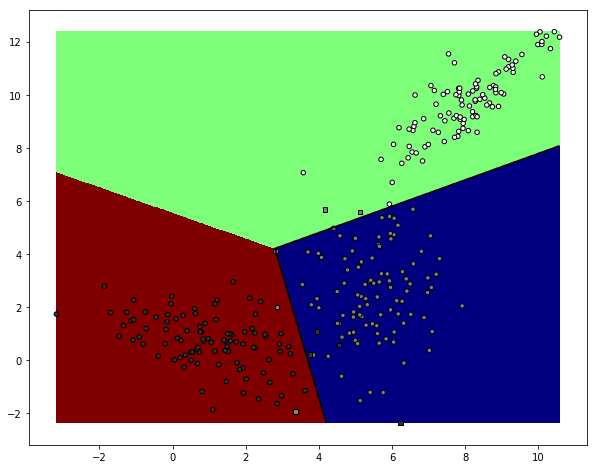

In [5]:
np.random.seed(100)
tf.set_random_seed(100)

X, Y_, Yoh_ = data.sample_gauss_2d(3, 100, one_hot=True)

_, D = X.shape
_, C = Yoh_.shape

tflr = tf_logreg.TFLogreg(D, C, 0.1)
tflr.train(X, Yoh_, 1000)

probs = tflr.eval(X)

Y = probs.argmax(axis=1)
dec_fun = lambda X: tflr.eval(X).argmax(axis=1)

rect = (np.min(X, axis=0), np.max(X, axis=0))

figure(figsize=(10,8))
data.graph_surface(dec_fun, rect)
data.graph_data(X, Y_, Y)
plt.show()


# Tensorflow duboki model

Instructions for updating:
Use `tf.global_variables_initializer` instead.
iteration 0: loss 1.0539591312408447
iteration 500: loss 0.48832982778549194
iteration 1000: loss 0.40238329768180847
iteration 1500: loss 0.3170354664325714
iteration 2000: loss 0.25013595819473267
iteration 2500: loss 0.20306168496608734
iteration 3000: loss 0.1696491837501526
iteration 3500: loss 0.14627867937088013
iteration 4000: loss 0.1301344633102417
iteration 4500: loss 0.11899017542600632


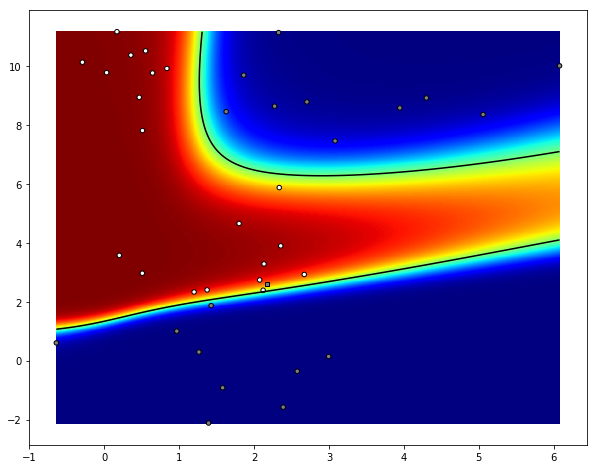

In [3]:
np.random.seed(42)
tf.set_random_seed(130)

X, Y_, Yoh_ = data.sample_gmm_2d(4, 2, 10, one_hot=True)

layers = [X.shape[1], 10, 10, Yoh_.shape[1]]
nn = tf_deep.TFDeep(layers, 0.05, 1e-4, activation=tf.sigmoid)
nn.train(X, Yoh_, 5000, 500)

probs = nn.eval(X)
Y = probs.argmax(axis=1)

dec_fun = lambda X: nn.eval(X)[:,1]
rect = (np.min(X, axis=0), np.max(X, axis=0))
figure(figsize=(10,8))
data.graph_surface(dec_fun, rect)
data.graph_data(X, Y_, Y)
plt.show()

[2, 2]
[0.7, 0.65, 0.7222222222222222]
[2, 10, 2]
[0.925, 1.0, 0.8695652173913043]
[2, 10, 10, 2]
[0.975, 0.95, 1.0]


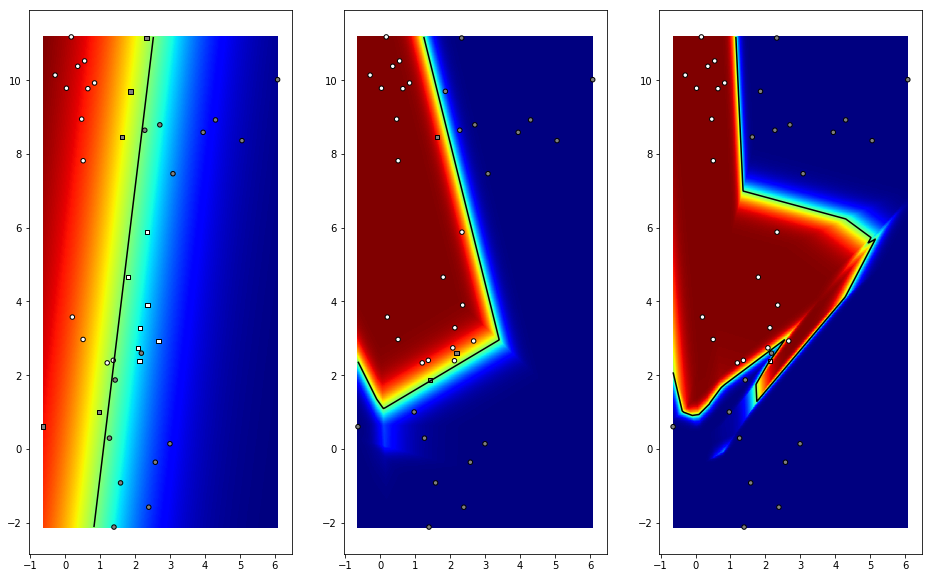

In [16]:
np.random.seed(42)
tf.set_random_seed(130)

X, Y_, Yoh_ = data.sample_gmm_2d(4, 2, 10, one_hot=True)

_in, _out = X.shape[1], Yoh_.shape[1]

configs = [[_in, _out], [_in, 10, _out], [_in, 10, 10, _out]]
figure(figsize=(16,10))

for i, layers in enumerate(configs):

    nn = tf_deep.TFDeep(layers, 0.05, 1e-4, activation=tf.nn.relu)
    nn.train(X, Yoh_, 5000, 500, verbose=False)

    probs = nn.eval(X)
    Y = probs.argmax(axis=1)

    dec_fun = lambda X: nn.eval(X)[:,1]
    rect = (np.min(X, axis=0), np.max(X, axis=0))
    plt.subplot(1, 3, i+1)
    data.graph_surface(dec_fun, rect)
    data.graph_data(X, Y_, Y)
    
    accuracy, recall, precision = data.eval_perf_binary(Y, Y_)
    print(layers)
    print([accuracy, recall, precision])
plt.show()

# MNIST

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
#tf.app.flags.DEFINE_string('data_dir', '/tmp/data/', 'Directory for storing data')

In [4]:
#print(tf.app.flags.FLAGS.data_dir)
mnist = input_data.read_data_sets('/tmp/data/', one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


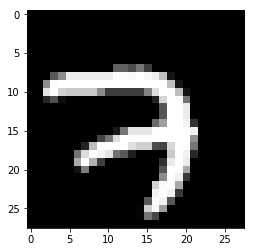

In [5]:
N = mnist.train.images.shape[0]
D = mnist.train.images.shape[1]
C = mnist.train.labels.shape[1]

plt.imshow(mnist.train.images[0].reshape(28,28), cmap='gray')

## [784 10]

In [19]:
X, Yoh_ = mnist.train.images, mnist.train.labels

layers = [X.shape[1], Yoh_.shape[1]]
nn = tf_deep.TFDeep(layers, 0.5, 1e-4)
nn.train(X, Yoh_, 3000)

iteration 0: loss 13.86253547668457
iteration 100: loss 1.7524596452713013
iteration 200: loss 1.3477749824523926
iteration 300: loss 1.181643009185791
iteration 400: loss 1.0819075107574463
iteration 500: loss 1.0125168561935425
iteration 600: loss 0.9601713418960571
iteration 700: loss 0.9185993671417236
iteration 800: loss 0.88433837890625
iteration 900: loss 0.8552844524383545
iteration 1000: loss 0.8300957083702087
iteration 1100: loss 0.8078786730766296
iteration 1200: loss 0.788011908531189
iteration 1300: loss 0.7700446844100952
iteration 1400: loss 0.7536417245864868
iteration 1500: loss 0.7385456562042236
iteration 1600: loss 0.7245559692382812
iteration 1700: loss 0.7115144729614258
iteration 1800: loss 0.6992948055267334
iteration 1900: loss 0.6877954006195068
iteration 2000: loss 0.6769330501556396
iteration 2100: loss 0.6666392087936401
iteration 2200: loss 0.6568566560745239
iteration 2300: loss 0.6475372314453125
iteration 2400: loss 0.6386384963989258
iteration 2500: l

In [22]:
Ws = nn.get_weights()

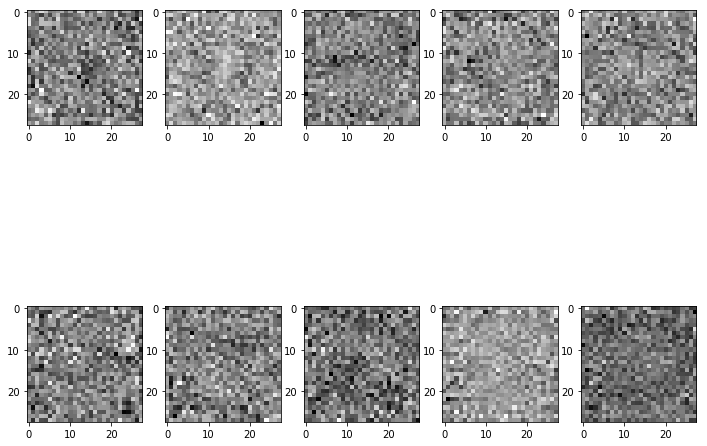

In [29]:
figure(figsize=(12,10))
for i, W in enumerate(Ws[0]):
    plt.subplot(2, 5, i+1)
    plt.imshow(W.reshape(28,28), cmap='gray')

plt.show()

0.9004


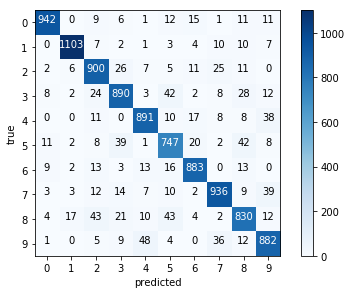

In [24]:
X = mnist.test.images
Y_ = mnist.test.labels.argmax(1)

probs = nn.eval(X)
Y = probs.argmax(axis=1)

from sklearn.metrics import accuracy_score
print(accuracy_score(Y, Y_))

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y, Y_)
plt.figure()
data.plot_confusion_matrix(cnf_matrix, classes=range(0, 10))

## [784 100 10]

In [30]:
X, Yoh_ = mnist.train.images, mnist.train.labels

layers2 = [X.shape[1], 100, Yoh_.shape[1]]
nn2 = tf_deep.TFDeep(layers2, 0.5, 1e-4)
nn2.train(X, Yoh_, 3000)

iteration 0: loss 23.874874114990234
iteration 100: loss 8.288013458251953
iteration 200: loss 7.573609352111816
iteration 300: loss 7.257199287414551
iteration 400: loss 7.131032466888428
iteration 500: loss 6.880514144897461
iteration 600: loss 6.733105659484863
iteration 700: loss 6.635427474975586
iteration 800: loss 4.636750221252441
iteration 900: loss 4.405627250671387
iteration 1000: loss 4.271022319793701
iteration 1100: loss 4.123012542724609
iteration 1200: loss 4.017541885375977
iteration 1300: loss 3.91509747505188
iteration 1400: loss 3.8683488368988037
iteration 1500: loss 3.749234676361084
iteration 1600: loss 3.682577133178711
iteration 1700: loss 3.6089463233947754
iteration 1800: loss 3.5579731464385986
iteration 1900: loss 3.494335889816284
iteration 2000: loss 3.4436497688293457
iteration 2100: loss 3.4391567707061768
iteration 2200: loss 3.3487908840179443
iteration 2300: loss 3.3020710945129395
iteration 2400: loss 3.2733426094055176
iteration 2500: loss 3.223129

0.9421


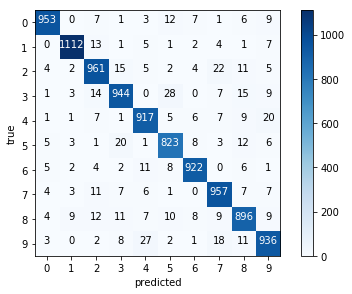

In [33]:
X = mnist.test.images
Y_ = mnist.test.labels.argmax(1)

probs = nn2.eval(X)
Y = probs.argmax(axis=1)

from sklearn.metrics import accuracy_score
print(accuracy_score(Y, Y_))

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y, Y_)
plt.figure()
data.plot_confusion_matrix(cnf_matrix, classes=range(0, 10))

## Minibatch

In [6]:
X, Yoh_ = mnist.train.images, mnist.train.labels

layers = [X.shape[1], Yoh_.shape[1]]
nn3 = tf_deep.TFDeep(layers, 0.5, 1e-4)
nn3.train_mb(X, Yoh_, 1000, 50, 0.8, 10)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
epoch 0: avg_loss 1.5260727054016132, val_loss 0.9790782928466797
epoch 10: avg_loss 0.42689222751015987, val_loss 0.45926201343536377
epoch 20: avg_loss 0.3339410396462141, val_loss 0.37564268708229065
epoch 30: avg_loss 0.304741634216837, val_loss 0.3469017744064331
epoch 40: avg_loss 0.29414974282580336, val_loss 0.3319522738456726
epoch 50: avg_loss 0.28966807958839286, val_loss 0.33933770656585693
epoch 60: avg_loss 0.2885607333430508, val_loss 0.3291882574558258
epoch 70: avg_loss 0.28739409061487453, val_loss 0.3351927399635315
epoch 80: avg_loss 0.28891994092952195, val_loss 0.33311599493026733
epoch 90: avg_loss 0.28829373194920743, val_loss 0.3353922665119171
epoch 100: avg_loss 0.28910678264430945, val_loss 0.33671700954437256
epoch 110: avg_loss 0.287872640441426, val_loss 0.32507115602493286
epoch 120: avg_loss 0.2883942127566449, val_loss 0.33106788992881775
epoch 130: avg_loss 0.2877856398636305, v

0.9203


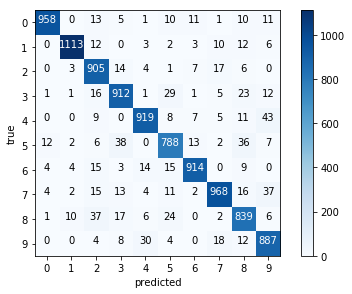

In [7]:
X = mnist.test.images
Y_ = mnist.test.labels.argmax(1)

probs = nn3.eval(X)
Y = probs.argmax(axis=1)

from sklearn.metrics import accuracy_score
print(accuracy_score(Y, Y_))

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y, Y_)
plt.figure()
data.plot_confusion_matrix(cnf_matrix, classes=range(0, 10))

## Adam fixed learning rate

In [10]:
X, Yoh_ = mnist.train.images, mnist.train.labels

layers = [X.shape[1], Yoh_.shape[1]]
nn4 = tf_deep.TFDeep(layers, 0.5, 1e-4)

global_step = tf.Variable(0, trainable=False)
learning_rate = 1e-4
nn4.train_step = tf.train.AdamOptimizer(learning_rate).minimize(nn4.loss, global_step)

nn4.train_mb(X, Yoh_, 1000, 50, 0.8, 10)

epoch 0: avg_loss 10.60089082067662, val_loss 8.838476181030273
epoch 10: avg_loss 2.048509905487298, val_loss 1.9916160106658936
epoch 20: avg_loss 1.2364627505567944, val_loss 1.2643818855285645
epoch 30: avg_loss 0.9751376186582178, val_loss 1.0187815427780151
epoch 40: avg_loss 0.8392485993152313, val_loss 0.888800323009491
epoch 50: avg_loss 0.7511625031009321, val_loss 0.8051921725273132
epoch 60: avg_loss 0.6869150962003254, val_loss 0.7427293658256531
epoch 70: avg_loss 0.637180280854756, val_loss 0.6939249038696289
epoch 80: avg_loss 0.5970121254636482, val_loss 0.6552148461341858
epoch 90: avg_loss 0.5635374545881685, val_loss 0.6220737099647522
epoch 100: avg_loss 0.5351062239571045, val_loss 0.5944061279296875
epoch 110: avg_loss 0.5107068354771898, val_loss 0.5695009827613831
epoch 120: avg_loss 0.48934050427580406, val_loss 0.5484526753425598
epoch 130: avg_loss 0.47043281387199093, val_loss 0.5290842652320862
epoch 140: avg_loss 0.45361655762588393, val_loss 0.5123604536

0.9248


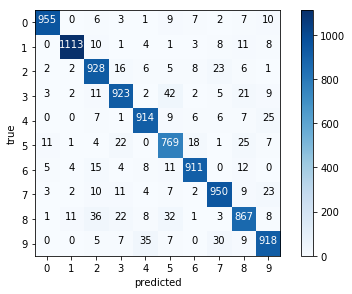

In [11]:
X = mnist.test.images
Y_ = mnist.test.labels.argmax(1)

probs = nn4.eval(X)
Y = probs.argmax(axis=1)

from sklearn.metrics import accuracy_score
print(accuracy_score(Y, Y_))

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y, Y_)
plt.figure()
data.plot_confusion_matrix(cnf_matrix, classes=range(0, 10))

## Adam exponential decay

In [15]:
X, Yoh_ = mnist.train.images, mnist.train.labels

layers = [X.shape[1], Yoh_.shape[1]]
nn5 = tf_deep.TFDeep(layers, 0.5, 1e-4)

global_step = tf.Variable(0, trainable=False)
learning_rate = tf.train.exponential_decay(0.1, global_step, 100, 0.98, staircase=True)
nn5.train_step = tf.train.AdamOptimizer(learning_rate).minimize(nn5.loss, global_step)

nn5.train_mb(X, Yoh_, 1000, 50, 0.8, 10)

epoch 0: avg_loss 1.5489519085735068, val_loss 1.475728154182434
epoch 10: avg_loss 0.391794052322141, val_loss 0.4633641541004181
epoch 20: avg_loss 0.27452764224091697, val_loss 0.3301701545715332
epoch 30: avg_loss 0.2561493406495589, val_loss 0.3219488561153412
epoch 40: avg_loss 0.2528765286911616, val_loss 0.3214693069458008
epoch 50: avg_loss 0.25222422464496697, val_loss 0.3209448456764221
epoch 60: avg_loss 0.2521031432869763, val_loss 0.32093867659568787
epoch 70: avg_loss 0.252080942106179, val_loss 0.3209388852119446
epoch 80: avg_loss 0.2520770369944246, val_loss 0.32093873620033264
epoch 90: avg_loss 0.2520763548937712, val_loss 0.3209386467933655
early stopping on epoch #100
epoch 100: avg_loss 0.2520763138563118, val_loss 0.3209386467933655


0.9263


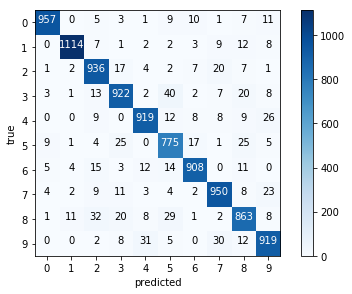

In [16]:
X = mnist.test.images
Y_ = mnist.test.labels.argmax(1)

probs = nn5.eval(X)
Y = probs.argmax(axis=1)

from sklearn.metrics import accuracy_score
print(accuracy_score(Y, Y_))

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y, Y_)
plt.figure()
data.plot_confusion_matrix(cnf_matrix, classes=range(0, 10))

## SVM

In [20]:
X, Yoh_ = mnist.train.images, mnist.train.labels
Y_ = Yoh_.argmax(axis=1)

clf = ksvm_wrap.KSVMWrap(X, Y_, 1, 'auto')

In [22]:
X = mnist.test.images
Y_ = mnist.test.labels.argmax(1)

probs = clf.predict(X)

0.9439


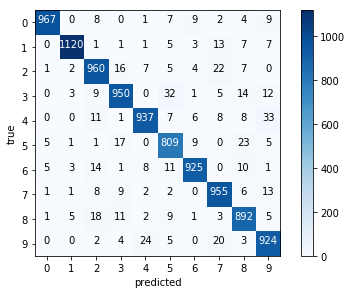

In [26]:
Y = probs

from sklearn.metrics import accuracy_score
print(accuracy_score(Y, Y_))

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y, Y_)
plt.figure()
data.plot_confusion_matrix(cnf_matrix, classes=range(0, 10))